## Homework Week 2

Rahma Hayuning Astuti

In [47]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv('../data/laptops.csv')
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### Preparing the dataset

In [41]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

### EDA

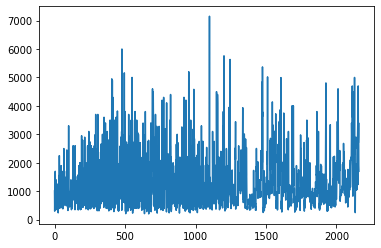

In [44]:
plt.plot(data['final_price'])

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

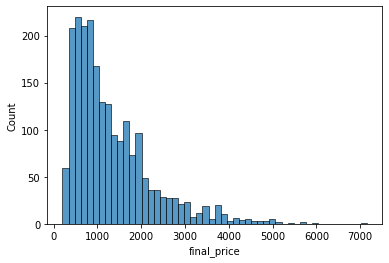

In [48]:
sns.histplot(data.final_price[data.final_price < 10000], bins = 50)

it does have long tail

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

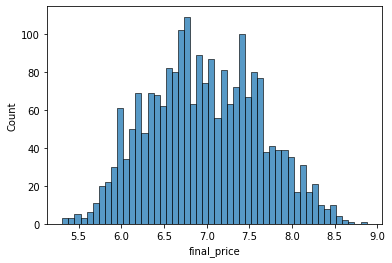

In [49]:
import numpy as np 

#need to normalize the distribution
price_logs = np.log1p(data.final_price)
sns.histplot(price_logs, bins=50)

In [50]:
# Question 1

data.isna().sum()
#answer = storage_type, gpu, screen

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [51]:
#Question 2
data['ram'].median()

# answer: 16

16.0

### Prepare and split the data

In [68]:
#portion that are going to split
n_data = len(data)

n_val = int(n_data*0.2)
n_test = int(n_data*0.2)
n_train = n_data - n_val - n_test
n_train, n_val, n_test

(1296, 432, 432)

In [69]:
# shuffle the dataset and split it
idx = np.arange(n_data)
np.random.seed(42)
np.random.shuffle(idx)

data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]

In [70]:
data_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
668,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2073,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
1113,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
788,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


In [71]:
df_train = data_train.reset_index(drop=True)
df_val = data_val.reset_index(drop=True)
df_test = data_test.reset_index(drop=True)

In [72]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [79]:
#preparing data,  filling missing value 
base = ['screen'
       ]

def prepare_X(data, fill_na):
    df_num = data[base]
    df_num = df_num.fillna(fill_na)
    X = df_num.values
    return X

In [74]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [75]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    #gamma matrix
    XTX = X.T.dot(X)

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

#### train with fill 0 version

In [80]:
#fill with 0 version
X_train_null = prepare_X(df_train, fill_na= 0)
w0_null, w_null = train_linear_regression(X_train_null, y_train)

X_val_null = prepare_X(df_val, fill_na= 0)
y_pred_null = w0_null + X_val_null.dot(w_null)


In [81]:
rmse_null = np.round(rmse(y_val, y_pred_null), 2)
rmse_null

0.64

In [82]:
#fill with mean version of 'total_bedrooms' because there's missing data
mean_screen = df_train['screen'].mean() #only use train

X_train_mean = prepare_X(df_train, fill_na= mean_screen)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val, fill_na= mean_screen) 
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_mean = np.round(rmse(y_val, y_pred_mean), 2)
rmse_mean

0.63

Answer both are equally good

### Question 4 

train with multiple r  = [0, 0.01, 0.1, 1, 5, 10, 100]

In [83]:
# answer

def train_linear_regression_reg(X, y, r =0.0):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    #gamma matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0_null_reg, w_null_reg = train_linear_regression_reg(X_train_null, y_train, r = r)
    y_pred_null_reg = w0_null_reg + X_val_null.dot(w_null_reg)
    score = np.round(rmse(y_val, y_pred_null_reg), 2)

    print(r, w0_null_reg, score)

0 5.633684694641892 0.64
1e-06 5.633684204908055 0.64
0.0001 5.633635721681136 0.64
0.001 5.633195003550156 0.64
0.01 5.628791631976264 0.64
0.1 5.585135592557709 0.64
1 5.183310497678367 0.64
5 3.929630056432109 0.65
10 3.0202833337320936 0.68


best rmse = the small one = 0.64 = 0

### Question 5

try different seed value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [84]:
rmse_null_seed = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(data)
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    #split dataset to 60, 20, 20
    n_val = int(n* 0.2)
    n_test = int(n* 0.2)
    n_train = n - n_val - n_test
    
    #data that already shuffle
    df_shuffle = data.iloc[idx]
    
    #preparing dataset
    df_train = df_shuffle.iloc[idx[:n_train]]
    df_val = df_shuffle.iloc[idx[n_train:n_train+n_val]]
    df_test = df_shuffle.iloc[idx[n_train+n_val:]]
    
    #reset index column
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    #Apply the log transformation to the `final_price` variable using the `np.log1p()` function.
    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)

    #delete 'median_house_value'
    del df_train['final_price']
    del df_test['final_price']
    del df_val['final_price']

    #fill with 0 version
    X_train_null = prepare_X(df_train, fill_na= 0)
    w0_null, w_null = train_linear_regression(X_train_null, y_train)

    X_val_null = prepare_X(df_val, fill_na= 0)
    y_pred_null = w0_null + X_val_null.dot(w_null)

    rmse_null = np.round(rmse(y_val, y_pred_null), 2)

    rmse_null_seed.append(rmse_null)
    print(r, w0_null, rmse_null)
    
        

10 5.377970942711149 0.64
10 5.004859172188176 0.65
10 5.483130351193276 0.63
10 5.716066360356002 0.61
10 5.376350597390381 0.62
10 5.4019994707316075 0.64
10 5.65321552552477 0.6
10 5.57336376214058 0.64
10 5.524825946966667 0.64
10 5.819260291520112 0.64


In [86]:
rmse_null_seed

[0.64, 0.65, 0.63, 0.61, 0.62, 0.64, 0.6, 0.64, 0.64, 0.64]

In [87]:
#standar deviation

std_score = np.std(rmse_null_seed).round(decimals= 3)
std_score

0.015

its different but i guess 19.176 the closer one

### Question 6

use seed 9
r = 0.001
rmse the best?

In [89]:
#split data with seed 9
n = len(data)
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

n_val = int(n* 0.2)
n_test = int(n* 0.2)
n_train = n - n_val - n_test

df_shuffle = data.iloc[idx]
df_train = df_shuffle.iloc[idx[:n_train]]
df_val = df_shuffle.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffle.iloc[idx[n_train+n_val:]]

#combine train and val dataset
combine = [df_train, df_val]
df_train_val = pd.concat(combine)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val = np.log1p(df_train_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train_val['final_price']
del df_test['final_price']

#train model with r = 0.001
r= 0.001
X_train_val = prepare_X(df_train_val, fill_na= 0)
w0_reg, w_reg = train_linear_regression_reg(X_train_val, y_train_val, r = r)

X_test = prepare_X(df_test, fill_na= 0)
y_pred_test = w0_reg + X_test.dot(w_reg)
score = (rmse(y_test, y_pred_test))

score

0.6356432934059186

the close one is 628.